## Preparation

Loading the dataset about breast cancer:


*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)

* perimeter

* area

* smoothness (local variation in radius lengths)

* compactness (perimeter^2 / area - 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour)

* symmetry

* fractal dimension (“coastline approximation” - 1)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter(action="ignore")

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                            columns=np.append(cancer['feature_names'], ['target']))

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## Data Inspection/Exploration

In [4]:
df['target'].value_counts()


1.0    357
0.0    212
Name: target, dtype: int64

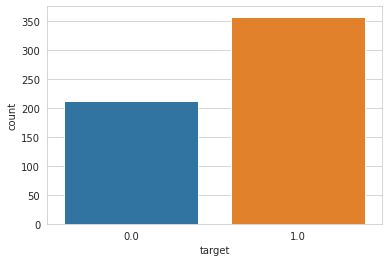

In [7]:
# inspect the distribution of the target variable 

sns.countplot(df["target"])
plt.show()

**Commentary**:  
When the dataset is imbalanced like this, it's better to use performance metrics, such as "AUC" (Area Under Curve)

In [8]:
#inspect the data and columns
# count number of empty values in each column

df.isna().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
#look at the data types to see if and which columns need to be encoded

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
#define X and y

X = df.drop(columns=["target"], axis=1)
y = df["target"]



In [15]:
# Checking out the result
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
# Checking out the y
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [19]:
from tensorflow.keras import utils
# Prepare the target variable to have a 2 dim shape

# Checking out shape of X (expected output: (569, 30))
X.shape

(569, 30)

In [20]:
# Checking out shape of y
y.shape

(569,)

**Commentary**:  
First, we'll try without reshaping to 2-dim.

## 1) Split the Data into Train/Test

In [28]:
from sklearn.model_selection import train_test_split
# use random state 42

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [29]:
# feature scaling - standardscaler
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

print("Before scaling:")
print(f"X_train['mean area'].mean() = {X_train['mean area'].mean()}")
print(f"X_train['mean area'].std()  = {X_train['mean area'].std()}")
print(f"X_test['mean area'].mean() = {X_test['mean area'].mean()}")
print(f"X_test['mean area'].std()  = {X_test['mean area'].std()}")

#scaler.fit(X_train)
#scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#scaler.fit(X_test)
X_test = scaler.transform(X_test)

# We don't have data leakage as we're not working with the test data mean (we know the train data mean)


# scaled arrays
print("After scaling:")
print(f"X_train['mean area'].mean() = {X_train[3].mean()}")
print(f"X_train['mean area'].std()  = {X_train[3].std()}")
print(f"X_test['mean area'].mean() = {X_test[3].mean()}")
print(f"X_test['mean area'].std()  = {X_test[3].std()}")


Before scaling:
X_train['mean area'].mean() = 654.3775824175823
X_train['mean area'].std()  = 354.9431872121614
X_test['mean area'].mean() = 656.9307017543858
X_test['mean area'].std()  = 341.07464475807683
After scaling:
X_train['mean area'].mean() = -0.29137567088745053
X_train['mean area'].std()  = 0.7077520021945312
X_test['mean area'].mean() = -0.03044547059820577
X_test['mean area'].std()  = 0.5521101672547237


In [31]:
print(f"X_train[4].mean() = {X_train[4].mean()}")
print(f"X_train[4].std()  = {X_train[4].std()}")
print(f"X_test[4].mean() = {X_test[4].mean()}")
print(f"X_test[4].std()  = {X_test[4].std()}")

X_train[4].mean() = -0.19895890306764658
X_train[4].std()  = 1.1427726020572646
X_test[4].mean() = -0.16640119661523395
X_test[4].std()  = 0.6833681620791682


## Create Classifier

In [33]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [61]:

# implement a NN with 2 hiddenlayers, for you could use first hidden layer of size 15, second of size 6 

def make_my_model():
    model = Sequential()

    model.add(Dense(15, input_dim=X_train.shape[1], activation='relu', kernel_initializer=keras.initializers.he_normal(seed=42), bias_initializer='zeros')) # first hidden layer, defines also the input layer
    model.add(Dense(6, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=42), bias_initializer='zeros')) # second hidden layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.he_normal(seed=42), bias_initializer='zeros')) # output layer

    return(model)

In [42]:
#compile the model
from tensorflow.keras.optimizers import Adam

model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
#show model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 96        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 568
Trainable params: 568
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 568
Trainable params: 568
Non-trainable params: 0
_________________________________________________________________


In [39]:
# see if you can reproduce the parameters from input to hidden layer:

#(dimension of W_1)
name = "dense"
print(f"Weights[{name}] = {model.get_layer(name).weights[0].numpy().size}")
print(f"Biases[{name}] = {model.get_layer(name).weights[1].numpy().size}")

# first hidden to second hidden layer
#(dimension of W_2))
name = "dense_1"
print(f"Weights[{name}] = {model.get_layer(name).weights[0].numpy().size}")
print(f"Biases[{name}] = {model.get_layer(name).weights[1].numpy().size}")


# second hidden to output layer
#(dimension of W_3 )
name = "dense_2"
print(f"Weights[{name}] = {model.get_layer(name).weights[0].numpy().size}")
print(f"Biases[{name}] = {model.get_layer(name).weights[1].numpy().size}")

Weights[dense] = 450
Biases[dense] = 15
Weights[dense_1] = 90
Biases[dense_1] = 6
Weights[dense_2] = 6
Biases[dense_2] = 1


In [44]:
#fit the model

batch_size = 10
epochs = 30

story = model.fit(x=X_train,
                  y=y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X_test, y_test))


Epoch 1/30
46/46 [==============================] - 1s 12ms/step - loss: 0.6150 - accuracy: 0.6847 - val_loss: 0.3472 - val_accuracy: 0.9123
Epoch 2/30
46/46 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8960 - val_loss: 0.2156 - val_accuracy: 0.9474
Epoch 3/30
46/46 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.8974 - val_loss: 0.1494 - val_accuracy: 0.9649
Epoch 4/30
46/46 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9284 - val_loss: 0.1131 - val_accuracy: 0.9825
Epoch 5/30
46/46 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9270 - val_loss: 0.0906 - val_accuracy: 0.9825
Epoch 6/30
46/46 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9456 - val_loss: 0.0755 - val_accuracy: 0.9912
Epoch 7/30
46/46 [==============================] - 0s 3ms/step - loss: 0.1185 - accuracy: 0.9550 - val_loss: 0.0654 - val_accuracy: 0.9912
Epoch 8/30
46/46 [=

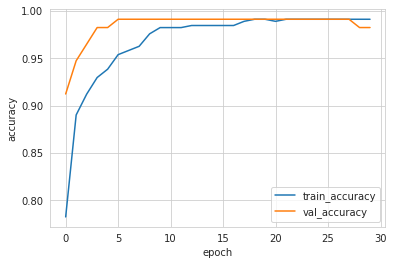

In [51]:
def show_history(story):
    plt.plot(story.history['accuracy'])
    plt.plot(story.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
    plt.show()

show_history(story)

In [53]:
#evaluate the model on Test data and save it into the variable score
eval_result = model.evaluate(
    x=X_test,
    y=y_test,
    # batch_size=batch_size
)

# print test loss and accuracy
print(f"Evaluation loss = {eval_result[0]:.3f}")
print(f"Evaluation accuracy = {eval_result[1]*100:.3f}%")

4/4 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9825
Evaluation loss = 0.040
Evaluation accuracy = 98.246%


The metrics that *evaluate()* gives us depend on the input argument *metrics* that we used when setting up our NN. Keras knows several other metrics (see [Keras doc. for details](https://keras.io/metrics/)) but not all known metrics are supported for training the NN. Between, you can also extend the set of metrics with customer metrics (see this [example](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/) if interested.).

We also have access to model performance results via the result of *model.fit()*, that is our variable *story*.

In [ ]:
# Now install the tensorflow addons and define the following metrics. You have AUC,Precision and Recall in Keras Metrics but F1 you will need to get it from tensorflow addons


In [54]:
!pip install tensorflow-addons



     |████████████████████████████████| 1.1 MB 17.0 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [59]:
#import keras
import tensorflow as tf 
import tensorflow_addons as tfa
# see a list of possible metrics you could use
metrics = [ 
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(),
    tfa.metrics.F1Score(
        name="f1_micro",
        average="micro",
        num_classes=1,
        threshold=0.5,
    ),
    tfa.metrics.F1Score(
        name="f1_weighted",
        average="weighted",
        num_classes=1,
        threshold=0.5,
    ),
]

In [62]:
# rerun the mmodel with the metrics accuracy and AUC metric in your complie call
model = make_my_model()
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=["accuracy", "AUC"])

# fit the model and save it into story 


In [63]:
story = model.fit(x=X_train,
                  y=y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X_test, y_test))

Epoch 1/30
46/46 [==============================] - 1s 14ms/step - loss: 0.5732 - accuracy: 0.7667 - auc: 0.8158 - val_loss: 0.3441 - val_accuracy: 0.9123 - val_auc: 0.9758
Epoch 2/30
46/46 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8839 - auc: 0.9429 - val_loss: 0.2144 - val_accuracy: 0.9474 - val_auc: 0.9913
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.9079 - auc: 0.9716 - val_loss: 0.1488 - val_accuracy: 0.9737 - val_auc: 0.9961
Epoch 4/30
46/46 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9343 - auc: 0.9760 - val_loss: 0.1125 - val_accuracy: 0.9825 - val_auc: 0.9967
Epoch 5/30
46/46 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9267 - auc: 0.9822 - val_loss: 0.0898 - val_accuracy: 0.9825 - val_auc: 0.9985
Epoch 6/30
46/46 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9517 - auc: 0.9920 - val_loss: 0.0751 - val_ac

In [66]:
story.history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

In [69]:
eval_result

[0.03922189772129059, 0.9824561476707458, 0.9993448853492737]

In [77]:
def show_enhanced_history(story, metric):
    plt.plot(story.history[metric])
    plt.plot(story.history['val_'+metric])
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train_'+metric, 'val_'+metric], loc='best')
    plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9825 - auc: 0.9993
Evaluation loss = 0.03922
Evaluation accuracy = 98.25%
Evaluation AUC = 0.99934


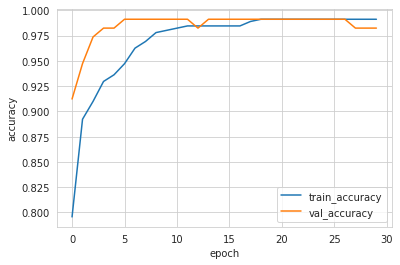

In [72]:
# print Test Loss and Accuracy and plot the history
#evaluate the model on Test data and save it into the variable score
eval_result = model.evaluate(
    x=X_test,
    y=y_test,
    # batch_size=batch_size
)

# print test loss and accuracy
print(f"Evaluation loss = {eval_result[0]:.5f}")
print(f"Evaluation accuracy = {eval_result[1]*100:.2f}%")
print(f"Evaluation AUC = {eval_result[2]:.5f}")

show_history(story)


In [73]:
# rerun the mmodel with the metrics accuracy and AUC metric in your complie call
model = make_my_model()
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=metrics)

story = model.fit(x=X_train,
                  y=y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X_test, y_test))

Epoch 1/30
46/46 [==============================] - 2s 14ms/step - loss: 0.5788 - precision: 0.7953 - recall: 0.6875 - auc: 0.7855 - f1_micro: 0.7370 - f1_weighted: 0.7370 - val_loss: 0.3520 - val_precision: 0.9552 - val_recall: 0.9014 - val_auc: 0.9767 - val_f1_micro: 0.9275 - val_f1_weighted: 0.9275
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.3828 - precision: 0.8777 - recall: 0.8800 - auc: 0.9314 - f1_micro: 0.8785 - f1_weighted: 0.8785 - val_loss: 0.2201 - val_precision: 0.9577 - val_recall: 0.9577 - val_auc: 0.9910 - val_f1_micro: 0.9577 - val_f1_weighted: 0.9577
Epoch 3/30
46/46 [==============================] - 0s 2ms/step - loss: 0.2558 - precision: 0.9360 - recall: 0.9403 - auc: 0.9696 - f1_micro: 0.9380 - f1_weighted: 0.9380 - val_loss: 0.1524 - val_precision: 0.9722 - val_recall: 0.9859 - val_auc: 0.9961 - val_f1_micro: 0.9790 - val_f1_weighted: 0.9790
Epoch 4/30
46/46 [==============================] - 0s 2ms/step - loss: 0.1912 - precision: 0

In [74]:
story.history.keys()

dict_keys(['loss', 'precision', 'recall', 'auc', 'f1_micro', 'f1_weighted', 'val_loss', 'val_precision', 'val_recall', 'val_auc', 'val_f1_micro', 'val_f1_weighted'])

4/4 [==============================] - 0s 2ms/step - loss: 0.0400 - precision: 0.9859 - recall: 0.9859 - auc: 0.9993 - f1_micro: 0.9859 - f1_weighted: 0.9859
Evaluation loss        = 0.03998
Evaluation precision   = 98.59%
Evaluation recall      = 98.59%
Evaluation AUC         = 0.99934
Evaluation F1 micro    = 98.59%
Evaluation F1 weighted = 98.59%


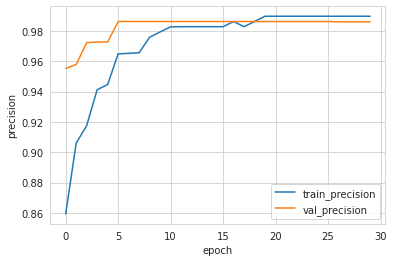

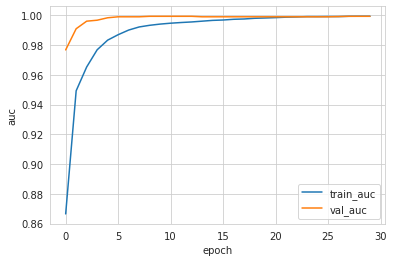

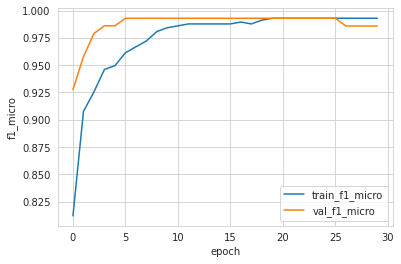

In [78]:
# print Test Loss and Accuracy and plot the history
#evaluate the model on Test data and save it into the variable score
eval_result = model.evaluate(
    x=X_test,
    y=y_test,
    # batch_size=batch_size
)

# print test loss and accuracy
print(f"Evaluation loss        = {eval_result[0]:.5f}")
print(f"Evaluation precision   = {eval_result[1]*100:.2f}%")
print(f"Evaluation recall      = {eval_result[2]*100:.2f}%")
print(f"Evaluation AUC         = {eval_result[3]:.5f}")
print(f"Evaluation F1 micro    = {eval_result[4]*100:.2f}%")
print(f"Evaluation F1 weighted = {eval_result[5]*100:.2f}%")


show_enhanced_history(story, "precision")
show_enhanced_history(story, "auc")
show_enhanced_history(story, "f1_micro")

**Commentary:**  
AUC above 0.7 means a good model.  
AUC = 0.5 is the same as random guess.


[Check out this link](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323)

```
# This is formatted as code
```



Typically validation loss should be similar to but slightly higher than training loss. 
As long as validation loss is lower than or even equal to training loss one should keep doing more training.
If training loss is reducing without increase in validation loss then again keep doing more training.
If validation loss starts increasing then it is time to stop.
Some over-fitting is nearly always a good thing. All that matters in the end is: is the validation loss as low as you can get it! 

If overall accuracy still not acceptable then review mistakes model is making and think of what can one change:
More data? More / different data augmentations? Different architecture?

In [79]:
# Compute predictions of X_test

yhat = model.predict(X_test)

yhat

array([[9.2393744e-01],
       [5.4745112e-07],
       [8.5421212e-05],
       [9.9957740e-01],
       [9.9990237e-01],
       [1.6403159e-14],
       [1.3400151e-11],
       [1.3596684e-02],
       [6.7626917e-01],
       [9.9903500e-01],
       [9.5159209e-01],
       [7.0747137e-03],
       [9.9508095e-01],
       [3.0920208e-03],
       [9.9669999e-01],
       [1.4519691e-04],
       [9.9826920e-01],
       [9.9993801e-01],
       [9.9998987e-01],
       [6.1673093e-09],
       [8.1686586e-01],
       [9.8284268e-01],
       [1.0440860e-12],
       [9.9960113e-01],
       [9.9804026e-01],
       [9.9897164e-01],
       [9.9830902e-01],
       [9.9965328e-01],
       [9.9664891e-01],
       [3.7298495e-08],
       [9.9929523e-01],
       [9.9963367e-01],
       [9.9393880e-01],
       [9.8689306e-01],
       [9.9970257e-01],
       [9.9720818e-01],
       [1.8507302e-02],
       [9.9552071e-01],
       [1.0625357e-06],
       [9.5928061e-01],
       [9.9943572e-01],
       [2.863109

**Commentary**:  
The resulting value in our final node is a _probability_ of belonging to the class1 (has cancer).
The interpretation would be if the probability is > 0.5 than it's likely that the patient has cancer (belongs to class 1)

In [82]:
# Finding the most probable class

class1 = yhat > 0.5
class0 = yhat <= 0.5
class1


array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [84]:
# print the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, class1)

array([[42,  1],
       [ 1, 70]])

In [88]:
#print classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, class1))


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        43
         1.0       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=93355ccb-7398-4c1f-9194-fec3c7f6574c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>